### Sobre o Notebook:

Esse Notebook faz parte de um exercício de explorar exemplos novos de modelos de regressão linear em Python após a conclusão da primeira semana do curso Aprendizado de máquina supervisionado: Regressão e classificação, da DeepLearning.AI, com o objetivo de fixar o conteúdo apresentado. Na primeira semana do curso exploramos bastante a descida de gradiente e sua intuição. Aqui irei explorar mais a fundo a sua aplicação.

**Nota:** Enquanto no aprendizado supervisionado, os dados vêm com entradas x e rótulos de entrada y, no aprendizado não supervisionado, os dados vêm apenas com entradas x, mas não com rótulos de saída y, e o algoritmo precisa encontrar alguma estrutura ou algum padrão ou algo interessante nos dados. Os dois principais tipos de aprendizado supervisionado são regressão e classificação. Aqui trataremos da regressão!

---

No presente Notebook usei a aula da UFG como base para aprofundamento.

O link da aula é o https://www.youtube.com/watch?v=nqNCNSg0Bt4

Outros materiais de referência foram utilizados e se encontram devidamente citados ao longo do Notebook.

---

---

#### Importando pacotes necessários

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from sklearn.preprocessing import StandardScaler # utilizada para normalizar dados p/ evitar problemas de aprendizado (geralmente entre -1 e 1)
from sklearn.model_selection import train_test_split # possibilita dividir os dados entre dados de treino e teste
from sklearn.linear_model import SGDRegressor # algoritmo de descida de gradiente estocástico p/ regressão

---

#### Carregando dataset

In [2]:
print(os.getcwd())

C:\Users\Maria Rafaela\Documents\Cursos\ML 2024\reinforcing


``Dataset origin: https://www.kaggle.com/datasets/uciml/autompg-dataset?resource=download``

In [3]:
df = pd.read_csv(os.getcwd() + '\\auto-mpg.csv')

In [4]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


---

**Variables:**

- mpg: Indicates the fuel efficiency of the car in miles per gallon.

- cylinders: Represents the number of cylinders in the engine.

- displacement: Engine size, measured in cubic inches.

- horsepower: The engine's power, reflecting performance capability.

- weight: Weight of the car, which affects fuel efficiency and performance.

- acceleration: Time required for the car to accelerate from 0 to a certain speed.

- model year: The year when the car model was released or manufactured.

- origin: Region or country where the car was manufactured (e.g., USA, Europe).

- car name: Descriptive name or identifier for the car model.

---

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [8]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [9]:
df.origin.unique()

array([1, 3, 2], dtype=int64)

In [10]:
df['car name'].value_counts().reset_index().sort_values(by='count', ascending=False).head(15)

,car name,count
0,ford pinto,6
2,amc matador,5
3,ford maverick,5
1,toyota corolla,5
4,chevrolet chevette,4
5,amc gremlin,4
6,chevrolet impala,4
7,peugeot 504,4
8,amc hornet,4
9,toyota corona,4


In [11]:
df.duplicated().value_counts()

False    398
Name: count, dtype: int64

In [12]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


---

#### Queremos prever a autonomia do veículo (mpg) a partir de seus atributos

> "The data concerns city-cycle fuel consumption in miles per gallon,
to be predicted in terms of 3 multivalued discrete and 5 continuous
attributes." (Quinlan, 1993)

- No presente exemplo vamos ter um teste simples em que usaremos apenas o peso do veículo para nos familiarizarmos de forma mais simples com os conceitos.

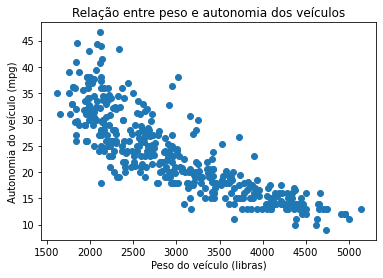

In [13]:
# analisando a dispersão dos dados com gráfico de dispersão

plt.scatter(df.weight, df.mpg)
plt.xlabel('Peso do veículo (libras)')
plt.ylabel('Autonomia do veículo (mpg)') # mpg = milhas por galão
plt.title('Relação entre peso e autonomia dos veículos')

plt.savefig('./fig1.jpeg', dpi = 300)

---

#### Pré-processamento

---

**``1.separando variável explicativa e target e convertendo unidades p/ padrão brasileiro``**

In [14]:
X = df[['weight']]
Y = df[['mpg']]

# Convertendo peso de libras -> kg 
# milhas/l -> km/l

X = X * 0.453592
Y = Y * 0.425143707

In [15]:
X, Y

(          weight
 0    1589.386368
 1    1675.115256
 2    1558.542112
 3    1557.181336
 4    1564.438808
 ..           ...
 393  1265.521680
 394   966.150960
 395  1040.993640
 396  1190.679000
 397  1233.770240
 
 [398 rows x 1 columns],
            mpg
 0     7.652587
 1     6.377156
 2     7.652587
 3     6.802299
 4     7.227443
 ..         ...
 393  11.478880
 394  18.706323
 395  13.604599
 396  11.904024
 397  13.179455
 
 [398 rows x 1 columns])

---

**``2.Dados estão em escalas muito grandes, precisamos normalizar isso para que facilite o aprendizado pela descida do gradiente!``**

> Nota: escala pode afetar diretamente o tamanho dos passos dados pelo algoritmo em direção ao mínimo da função de custo, podendo levá-lo a convergir lentamente.

In [16]:
escala = StandardScaler()
escala.fit(X) # dizendo para escala se moldar em torno da estrutura da variável X. Transforma os valores para terem média 0 e desvio padrão 1.
X_norm = escala.transform(X)

In [17]:
X_norm[:5]

array([[0.63086987],
       [0.85433297],
       [0.55047045],
       [0.54692342],
       [0.56584093]])

In [18]:
X_norm.mean(), X_norm.std()

(1.2496982789750506e-16, 1.0)

(array([31., 90., 59., 54., 37., 40., 29., 34., 18.,  6.]),
 array([-1.60494344, -1.18793056, -0.77091768, -0.3539048 ,  0.06310808,
         0.48012096,  0.89713384,  1.31414672,  1.7311596 ,  2.14817248,
         2.56518536]),
 <BarContainer object of 10 artists>)

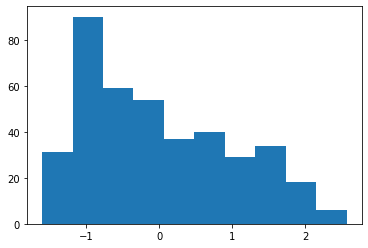

In [19]:
plt.hist(X_norm)

In [20]:
min(X_norm), max(X_norm)

(array([-1.60494344]), array([2.56518536]))

{'whiskers': [<matplotlib.lines.Line2D at 0x184642c86d0>,
 'caps': [<matplotlib.lines.Line2D at 0x184642c8d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x184642c8220>],
 'medians': [<matplotlib.lines.Line2D at 0x184642d5490>],
 'fliers': [<matplotlib.lines.Line2D at 0x184642d5820>],
 'means': []}

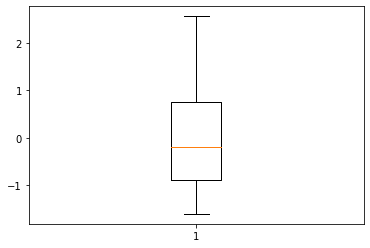

In [21]:
plt.boxplot(X_norm)

---

**``3. Separando conjundo de dados entre treino e teste``**

In [22]:
# Retorna 4 matrizes (x treino e x teste + y treino e y teste)
X_norm_train, X_norm_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size = 0.3) # separando 30% dos dados para teste e 70% para treino

In [23]:
X_norm_train.shape, X_norm_test.shape, Y_train.shape, Y_test.shape

((278, 1), (120, 1), (278, 1), (120, 1))

---

#### Processamento

---

**``1. Aplicando modelo de aprendizagem de máquina``**

**Gradient descent summary (Resumo do curso da DeepLearning.AI):**

We have developed a linear model that predicts $f_{w,b}(x^{(i)})$:

$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 



In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.


---


#### No presente exemplo da aula da UFG foi usado o modelo estocástico de descida de gradiente.

<figure>
  <img align="left" src="./gradiente_from_towards.webp" style="width:340px;height:240px;">
</figure>

Fonte da imagem: [Towards Data Science](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a)


ChatGPT: O modelo estocástico de descida de gradiente (ou Stochastic Gradient Descent, SGD) é uma variação do algoritmo de descida de gradiente que utiliza um subconjunto aleatório de dados (chamado de "mini-batch" ou "exemplo único") para calcular o gradiente e atualizar os parâmetros do modelo, em vez de usar o conjunto completo de dados.

- Na aula do curso da DeepLearning.AI comentamos sobre o exemplo em que testa o lote todo! Ele é conhecido como  Batch Gradient Descent (Batch em inglês significa lote).

- Aqui tá um artigo explicando diferentes abordagens de descida de gradiente: https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a

---

<figure>
  <img align="left" src="./desc_gradiente_estocastico.webp" style="width:240px;height:340px;">
</figure>

Fonte da imagem: [Towards Data Science](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a)

> "The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step." [Fonte aqui!](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a)

> Sobre isso, o que temos no curso da DeepLearning.AI: _"Quando você ouve alguém falar sobre descida de gradiente, essa pessoa sempre se refere às descidas de gradiente em que você executa uma atualização simultânea dos parâmetros. **Se, no entanto, você implementasse uma atualização não simultânea, provavelmente funcionará mais ou menos de qualquer maneira. Mas fazer isso dessa maneira não é realmente a maneira correta de implementá-lo, é na verdade algum outro algoritmo com propriedades diferentes**. Eu aconselho você a manter a atualização simultânea correta e não usar essa versão incorreta [...]."_

> Sobre isso, o que nos diz o artigo da Towards Data Science: "Since we are considering just one example at a time the cost will fluctuate over the training examples and it will not necessarily decrease. But in the long run, you will see the cost decreasing with fluctuations. Also because the cost is so fluctuating, it will never reach the minima but it will keep dancing around it. SGD can be used for larger datasets. It converges faster when the dataset is large as it causes updates to the parameters more frequently. [...] Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. [...] Just like every other thing in this world, all the three variants we saw have their advantages as well as disadvantages." [Fonte aqui!](https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a)





---
> "Na equação, Alpha também é chamado de taxa de aprendizado. A taxa de aprendizado geralmente é um pequeno número positivo entre 0 e 1 e pode ser, digamos, 0,01. O que o Alpha faz é basicamente controlar o tamanho do passo que você dá ladeira abaixo. Se o Alpha for muito grande, isso corresponde a um procedimento de descida de gradiente muito agressivo, no qual você está tentando dar grandes passos ladeira abaixo. Se Alpha for muito pequeno, você estaria dando pequenos passos ladeira abaixo."

In [24]:
### Sobre os hiperparâmetros

# max_iter: número máximo de épocas; executará até 500 interações de épocasse não convergir antes
# learning rate: taxa de aprendizagem (o fator que vai multiplicar o gradiente a cada época)
# tol: se a acada época a função de custo não melhor em pelo menos 0.0001, quer dizer que o algoritmo convergiu e dessa forma ele pode parar antes

RegL = SGDRegressor(max_iter=500, 
                    eta0=0.01, # taxa inicial de aprendizagem
                    tol=0.0001,
                    verbose=1 # mostra comoserá o aprendizado do modelo para cada época
                   )

In [25]:
# Fazendo com que o modelo realize o aprendizado (.fit = molde)
RegL.fit(X_norm_train, Y_train) # Avg. loss: é a nossa função de custo que converge até não conseguir melhorar 

-- Epoch 1
Norm: 1.77, NNZs: 1, Bias: 5.951388, T: 278, Avg. loss: 23.515037
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.29, NNZs: 1, Bias: 7.827304, T: 556, Avg. loss: 6.480026
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.54, NNZs: 1, Bias: 8.737992, T: 834, Avg. loss: 3.050836
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.68, NNZs: 1, Bias: 9.220950, T: 1112, Avg. loss: 2.066408
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.75, NNZs: 1, Bias: 9.502037, T: 1390, Avg. loss: 1.741053
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.79, NNZs: 1, Bias: 9.678706, T: 1668, Avg. loss: 1.619541
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.81, NNZs: 1, Bias: 9.781798, T: 1946, Avg. loss: 1.571951
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.83, NNZs: 1, Bias: 9.849997, T: 2224, Avg. loss: 1.553328
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.84, NNZs: 1, Bias: 9.900079, T: 2502, Avg. loss: 1.544142
Total training time: 0.00 sec

C:\Users\Maria Rafaela\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(max_iter=500, tol=0.0001, verbose=1)

---
#### Pós processamento

----

> Usaremos o modelo pré-treinado para tentar prever a eficiência do veículo com base em um peso X contidos nos nossos dados de teste.

In [26]:
Y_prev = RegL.predict(X_norm_test)

In [27]:
Y_prev

array([ 9.41052911, 12.86867782,  8.44428168,  5.05393982, 11.80411047,
        5.35907058, 13.40096149,  6.8338693 , 11.94989517,  5.00308469,
        7.22375861,  9.3766257 , 11.32607227,  7.78316502, 11.42778253,
       10.37677655, 13.26534782, 13.02463354, 10.25811458,  9.03759151,
        4.01310486, 13.32637397, 11.26843646,  9.17320518, 11.54305415,
       12.76696756,  9.09522732, 13.97053892, 12.85511645,  9.83432185,
       12.98733978, 12.85172611,  5.69132409, 11.12265176, 10.19030774,
       11.15655518, 12.71950278,  7.80689741, 11.67527748,  5.06411084,
        8.17644468, 11.39048876,  6.69825562, 12.41437201, 10.86498578,
        7.83402015,  4.94544888, 10.8344727 ,  4.331797  , 10.11232988,
       11.56000586,  9.34272228, 12.15670603, 10.45136407,  7.69840647,
       12.78391927, 14.46552884,  8.1052475 ,  6.6236681 ,  6.01679691,
       13.39418081, 11.81767184,  8.4781851 , 13.42808423, 10.99720911,
        3.11466427,  9.47494561, 12.8347744 ,  6.16258161, 13.95

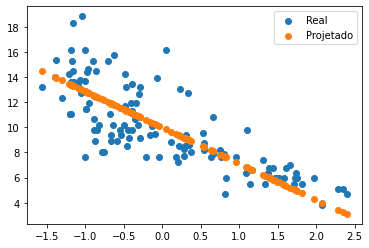

In [28]:
plt.scatter(X_norm_test, Y_test, label='Real')
plt.scatter(X_norm_test, Y_prev, label='Projetado')
plt.legend()

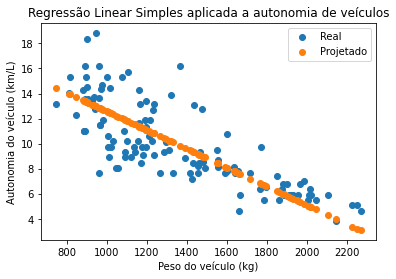

In [29]:
# Plotando com x fora do processo de normalização aplicado
X_test = escala.inverse_transform(X_norm_test)

plt.scatter(X_test, Y_test, label='Real')
plt.scatter(X_test, Y_prev, label='Projetado')
plt.legend()
plt.xlabel("Peso do veículo (kg)")
plt.ylabel('Autonomia do veículo (km/L)')
plt.title('Regressão Linear Simples aplicada a autonomia de veículos')

plt.savefig('./fig2.jpeg', dpi = 300)